# FAKE NEPALI NEWS DETECTION USING LOGISTIC REGRESSION AND SUPPORT VECTOR MACHINE(SVM)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/translated-data-english-validation/translated_data_english_validation.tsv
/kaggle/input/translated-data-english/translated_data_english.tsv
/kaggle/input/translated-data-english-test/translated_data_english_test.tsv


**NECESSARY IMPORT**

In [2]:
import nltk
# The NLTK data package includes a pre-trained Punkt tokenizer for English.
# punkt had to be manually downloaded using the command below
# same with stopwords
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**READ THE TRAIN DATASET TO LOAD INTO THE DATAFRAME**

In [3]:
df = pd.read_csv('/kaggle/input/translated-data-english/translated_data_english.tsv', sep='\t')

In [4]:
df.head()

,id,label,statement,subjects,speaker,speaker_job_title,state_info,party_affilation,count_1,count_2,count_3,count_4,count_5,context,statement_removedpunctuation,nepali_translation,english_translation
0,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,When did the decline of coal start It started ...,कोइलाको पतन कहिले सुरु भयो यो प्राकृतिक ग्यास ...,When did the decline of coal begin? It began w...
1,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,Hillary Clinton agrees with John McCain by vot...,हिलारी क्लिन्टनले जर्ज बुशलाई इरानमा शंकाको फा...,Hillary Clinton agreed with John McCain by vot...
2,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,Health care reform legislation is likely to ma...,स्वास्थ्य हेरचाह सुधार कानूनले नि: शुल्क लिंग ...,Health care reform legislation is likely to ma...
3,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,The economic turnaround started at the end of ...,मेरो कार्यकालको अन्त्यमा आर्थिक परिवर्तन सुरु भयो,"Towards the end of my tenure, the economic tra..."
4,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece,The Chicago Bears have had more starting quart...,शिकागो बियर्सले विगत दुई दशकहरूमा बर्खास्त गरि...,The Chicago Bears have had more starting quart...


**LOWERING THE "english_translation"**

In [6]:
df['english_translation'] = df['english_translation'].str.lower()

In [7]:
df.head()

,id,label,statement,subjects,speaker,speaker_job_title,state_info,party_affilation,count_1,count_2,count_3,count_4,count_5,context,statement_removedpunctuation,nepali_translation,english_translation
0,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,When did the decline of coal start It started ...,कोइलाको पतन कहिले सुरु भयो यो प्राकृतिक ग्यास ...,when did the decline of coal begin? it began w...
1,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,Hillary Clinton agrees with John McCain by vot...,हिलारी क्लिन्टनले जर्ज बुशलाई इरानमा शंकाको फा...,hillary clinton agreed with john mccain by vot...
2,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,Health care reform legislation is likely to ma...,स्वास्थ्य हेरचाह सुधार कानूनले नि: शुल्क लिंग ...,health care reform legislation is likely to ma...
3,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,The economic turnaround started at the end of ...,मेरो कार्यकालको अन्त्यमा आर्थिक परिवर्तन सुरु भयो,"towards the end of my tenure, the economic tra..."
4,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece,The Chicago Bears have had more starting quart...,शिकागो बियर्सले विगत दुई दशकहरूमा बर्खास्त गरि...,the chicago bears have had more starting quart...


**REMOVING PUNCUTATION FROM "english_translation"**

In [9]:
import string
def removepunctuation(sentence):
   new_text = sentence.replace("—", " ") # "—" in the text was not equivalent to "-" so we replcaed "—" with a space
   print 
  #iterate over every single character to see if it is a punctuation or not, and then concatenate them using "join"
   punctuationfree="".join([i for i in new_text if i not in string.punctuation])
   return punctuationfree

In [10]:
df["statement_removedpunctuation"] = df['english_translation'].apply(lambda x : removepunctuation(x))

**"statement_removed punctuation" contains the 'statement' column, with lowercased characters and removed punctuation**

In [11]:
df.head()

,id,label,statement,subjects,speaker,speaker_job_title,state_info,party_affilation,count_1,count_2,count_3,count_4,count_5,context,statement_removedpunctuation,nepali_translation,english_translation
0,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,when did the decline of coal begin it began wi...,कोइलाको पतन कहिले सुरु भयो यो प्राकृतिक ग्यास ...,when did the decline of coal begin? it began w...
1,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,hillary clinton agreed with john mccain by vot...,हिलारी क्लिन्टनले जर्ज बुशलाई इरानमा शंकाको फा...,hillary clinton agreed with john mccain by vot...
2,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,health care reform legislation is likely to ma...,स्वास्थ्य हेरचाह सुधार कानूनले नि: शुल्क लिंग ...,health care reform legislation is likely to ma...
3,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,towards the end of my tenure the economic tran...,मेरो कार्यकालको अन्त्यमा आर्थिक परिवर्तन सुरु भयो,"towards the end of my tenure, the economic tra..."
4,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece,the chicago bears have had more starting quart...,शिकागो बियर्सले विगत दुई दशकहरूमा बर्खास्त गरि...,the chicago bears have had more starting quart...


**TOKENIZING THE "statement_removed punctuation"**



In [13]:
df["english_translation_tokenized"] = df["statement_removedpunctuation"].apply(word_tokenize)

In [14]:
df["english_translation_tokenized"].iloc[7]

['however',
 'it',
 'took',
 'one',
 'hundred',
 'and',
 'ninetyfive',
 'million',
 'in',
 'oregon',
 'lottery',
 'funds',
 'for',
 'the',
 'port',
 'of',
 'newport',
 'to',
 'finally',
 'land',
 'the',
 'new',
 'noaa',
 'marine',
 'operations',
 'center',
 'in',
 'the',
 'pacific']

**A new column, "english_translation_tokenized", is created and it contains the tokens generated from the sentence.**

**Generate a list of stop words for stopword removal**



In [15]:
stop_words = stopwords.words('english')

**REMOVING STOP WORDS FROM "english_translation_tokenized"**



In [16]:
def stopwordremoval(words):
    preprocessed_tokens = []
    for i in words:
        # Remove stopwords and empty strings while keeping words separated by space
        post_removal = [word for word in i.split() if word.lower() not in stop_words]
        filtered_string = " ".join(post_removal).strip()
        if filtered_string:
            preprocessed_tokens.append(filtered_string)
    # Combine the preprocessed tokens into a single string
    combined_string = " ".join(preprocessed_tokens)
    return combined_string

In [17]:
stopwordremoval(['however',
 'it',
 'took',
 'one',
 'hundred',
 'and',
 'ninetyfive',
 'million',
 'in',
 'oregon',
 'lottery',
 'funds',
 'for',
 'the',
 'port',
 'of',
 'newport',
 'to',
 'finally',
 'land',
 'the',
 'new',
 'noaa',
 'marine',
 'operations',
 'center',
 'in',
 'the',
 'pacific'])

'however took one hundred ninetyfive million oregon lottery funds port newport finally land new noaa marine operations center pacific'

In [18]:
df["english_translation_stopwords"] = df["english_translation_tokenized"].apply(stopwordremoval)

In [19]:
df.head()

,id,label,statement,subjects,speaker,speaker_job_title,state_info,party_affilation,count_1,count_2,count_3,count_4,count_5,context,statement_removedpunctuation,nepali_translation,english_translation,english_translation_tokenized,english_translation_stopwords
0,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,when did the decline of coal begin it began wi...,कोइलाको पतन कहिले सुरु भयो यो प्राकृतिक ग्यास ...,when did the decline of coal begin? it began w...,"[when, did, the, decline, of, coal, begin, it,...",decline coal begin began natural gas layoff be...
1,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,hillary clinton agreed with john mccain by vot...,हिलारी क्लिन्टनले जर्ज बुशलाई इरानमा शंकाको फा...,hillary clinton agreed with john mccain by vot...,"[hillary, clinton, agreed, with, john, mccain,...",hillary clinton agreed john mccain voting give...
2,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,health care reform legislation is likely to ma...,स्वास्थ्य हेरचाह सुधार कानूनले नि: शुल्क लिंग ...,health care reform legislation is likely to ma...,"[health, care, reform, legislation, is, likely...",health care reform legislation likely mandate ...
3,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,towards the end of my tenure the economic tran...,मेरो कार्यकालको अन्त्यमा आर्थिक परिवर्तन सुरु भयो,"towards the end of my tenure, the economic tra...","[towards, the, end, of, my, tenure, the, econo...",towards end tenure economic transformation began
4,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece,the chicago bears have had more starting quart...,शिकागो बियर्सले विगत दुई दशकहरूमा बर्खास्त गरि...,the chicago bears have had more starting quart...,"[the, chicago, bears, have, had, more, startin...",chicago bears starting quarterbacks past ten y...


In [20]:
df["statement_removedpunctuation"].iloc[200]

'over the past year more than twenty percent of americans have changed their minds about the war in afghanistan concluding that we shouldnt be there'

In [21]:
df["english_translation_stopwords"].iloc[200]

'past year twenty percent americans changed minds war afghanistan concluding shouldnt'

In [22]:
import spacy

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

**Used to load the English language model of spaCy**



In [23]:
nlp = spacy.load("en_core_web_sm")


**PERFORMING LEMMETIZATION ON "english_translation_stopwords". Lemmatization is the process of reducing a word to its base or root form.**

In [24]:
def lemmetization(text):
    doc = nlp(text)
    lemmetized = []
    for token in doc:
        lemmetized.append(token.lemma_)
    return " ".join(lemmetized)


In [25]:
df["preprocessed_english"] = df["english_translation_stopwords"].apply(lemmetization)

**VALUE COUNTS FOR LABELS. OUR DATASET CONSIST OF SIX LABELS, WHICH WE WOULD BE REDUCING TO 3.**

In [26]:
df.value_counts('label')

label
half-true      2114
false          1993
mostly-true    1961
true           1675
barely-true    1654
pants-fire      839
dtype: int64

In [27]:
df.head()

,id,label,statement,subjects,speaker,speaker_job_title,state_info,party_affilation,count_1,count_2,count_3,count_4,count_5,context,statement_removedpunctuation,nepali_translation,english_translation,english_translation_tokenized,english_translation_stopwords,preprocessed_english
0,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,when did the decline of coal begin it began wi...,कोइलाको पतन कहिले सुरु भयो यो प्राकृतिक ग्यास ...,when did the decline of coal begin? it began w...,"[when, did, the, decline, of, coal, begin, it,...",decline coal begin began natural gas layoff be...,decline coal begin begin natural gas layoff be...
1,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,hillary clinton agreed with john mccain by vot...,हिलारी क्लिन्टनले जर्ज बुशलाई इरानमा शंकाको फा...,hillary clinton agreed with john mccain by vot...,"[hillary, clinton, agreed, with, john, mccain,...",hillary clinton agreed john mccain voting give...,hillary clinton agree john mccain voting give ...
2,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,health care reform legislation is likely to ma...,स्वास्थ्य हेरचाह सुधार कानूनले नि: शुल्क लिंग ...,health care reform legislation is likely to ma...,"[health, care, reform, legislation, is, likely...",health care reform legislation likely mandate ...,health care reform legislation likely mandate ...
3,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,towards the end of my tenure the economic tran...,मेरो कार्यकालको अन्त्यमा आर्थिक परिवर्तन सुरु भयो,"towards the end of my tenure, the economic tra...","[towards, the, end, of, my, tenure, the, econo...",towards end tenure economic transformation began,towards end tenure economic transformation begin
4,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece,the chicago bears have had more starting quart...,शिकागो बियर्सले विगत दुई दशकहरूमा बर्खास्त गरि...,the chicago bears have had more starting quart...,"[the, chicago, bears, have, had, more, startin...",chicago bears starting quarterbacks past ten y...,chicago bear start quarterback past ten year t...


In [28]:
df["preprocessed_english"].iloc[0]

'decline coal begin begin natural gas layoff begin administration president george w bush'

**REVIEWING THE NULL VALUES**

In [29]:
df.isnull().sum()

id                                  0
label                               0
statement                           0
subjects                            2
speaker                             2
speaker_job_title                2895
state_info                       2208
party_affilation                    2
count_1                             2
count_2                             2
count_3                             2
count_4                             2
count_5                             2
context                           102
statement_removedpunctuation        0
nepali_translation                  0
english_translation                 0
english_translation_tokenized       0
english_translation_stopwords       0
preprocessed_english                0
dtype: int64

**REMOVING NULL VALUES**

In [30]:
df.dropna(subset=['subjects', 'speaker','party_affilation'], inplace=True)

In [31]:
df.dropna(subset=['context'], inplace=True)

In [32]:
df.shape

(10134, 20)

In [33]:
df.isnull().sum()

id                                  0
label                               0
statement                           0
subjects                            0
speaker                             0
speaker_job_title                2864
state_info                       2183
party_affilation                    0
count_1                             0
count_2                             0
count_3                             0
count_4                             0
count_5                             0
context                             0
statement_removedpunctuation        0
nepali_translation                  0
english_translation                 0
english_translation_tokenized       0
english_translation_stopwords       0
preprocessed_english                0
dtype: int64

In [34]:
df.value_counts('label')

label
half-true      2097
false          1970
mostly-true    1944
true           1655
barely-true    1640
pants-fire      828
dtype: int64

In [35]:
df.replace(to_replace=["true", "mostly-true"],
           value="true", inplace=True)
df.replace(to_replace=["false", "pants-fire"],
           value="false", inplace=True)
df.replace(to_replace=["half-true", "barely-true"],
           value="vague", inplace=True)


**WE HAVE COMBINED:**

1. "true" and "mostly-true" to represent as true
2. "false" and "pants-fire" to represent as fasle
3. "half-true" and "barely-true" to represent as vague

In [36]:
df.value_counts('label')

label
vague    3737
true     3599
false    2798
dtype: int64

**TF-IDF is a numerical representation technique that aims to quantify the importance of a word in a document relative to a collection of documents.**

**TF (Term Frequency) measures the frequency of a word in a document relative to the total number of words in that document.** 

**IDF (Inverse Document Frequency) measures the rarity or uniqueness of a word in a collection of documents.**

**The TF-IDF score is computed by multiplying the TF and IDF values for each word in the document. The higher the TF-IDF score for a word in a document, the more significant that word is in distinguishing or representing the document within the document collection.**

In [38]:
vectorizer = TfidfVectorizer(lowercase = False)


**IN THIS LR AND SVM IMPLEMENTATION WE HAVE TAKEN MULTIPLE INPUT FEATURES AS 'preprocessed_english', 'subjects', 'speaker', 'party_affilation' AND'context'.**

**AND THE TARGET VARIABLE IS THE "label"**

In [41]:
features = df[['preprocessed_english', 'subjects', 'speaker', 'party_affilation', 'context']]
target = df['label'] 

In [42]:
features_transformed = vectorizer.fit_transform(features.apply(lambda x: ' '.join(x), axis=1))

In [43]:
features_transformed.shape

(10134, 13331)

**TRAIN, TEST SPLIT WITH THE test_size=0.2**

In [44]:
X_train, X_test, y_train, y_test = train_test_split(features_transformed, target, test_size=0.2, random_state=42)

# LOGISTIC REGRESSION

**Logistic Regression is a classification algorithm that is commonly used for binary classification problems. It can also be extended to handle multi-class classification tasks.**

In [45]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
y_pred = lr_model.predict(X_test)
y_pred

array(['true', 'true', 'false', ..., 'true', 'false', 'true'],
      dtype=object)

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       false       0.47      0.34      0.39       566
        true       0.47      0.52      0.49       732
       vague       0.42      0.47      0.44       729

    accuracy                           0.45      2027
   macro avg       0.45      0.44      0.44      2027
weighted avg       0.45      0.45      0.45      2027



**Through classification report we can see that: Precision : It is the ratio of (true positive) / (true positive + false positive)**

* lets see the precision for false =>  which shows that 47% of prediction for class fasle were correct.
* Similary for true, 47% of prediction were correct.
* For vague, 42% of predition were correct.

**Recall : It is the ratio of (true positive)/ (true positive + false negative)**

* The recall for fasle is 0.34, indicating that 34% of the actual instances of fasle were correctly identified by the model.
* The recall for true is 0.52, indicating that 52% of the actual instances of true were correctly identified by the model.
* The recall for vague is 0.47, indicating that 47% of the actual instances of vague were correctly identified by the model.

**The F1-score is the harmonic mean of precision and recall. It provides a balanced measure of the model's performance by considering both precision and recall.**

**Support represents the number of actual occurrences of each class in the test data.**

* false = 566
* true = 732 
* vague = 729

In [55]:
confusion_mat = confusion_matrix(y_test, y_pred)
class_labels = ['false','true','vague']

# COINFUSION MATRIX

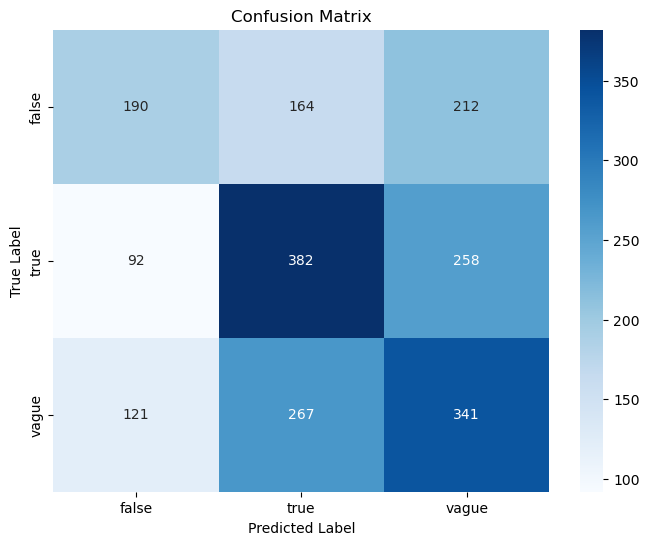

In [56]:
confusion_df = pd.DataFrame(confusion_mat, index=class_labels, columns=class_labels)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [57]:
train_accuracy = lr_model.score(X_train, y_train)
print("Train Accuracy:", train_accuracy)

Train Accuracy: 0.7619341309979031


In [59]:
test_accuracy = lr_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.450419338924519


# SUPPORT VECTOR MACHINE

**Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and regression tasks. It is particularly effective in handling complex datasets with high-dimensional feature spaces.**

In [51]:
svc = SVC()
svc.fit(X_train, y_train)
svc.score(X_train, y_train)

0.9536203281115085

In [60]:
svc.score(X_test, y_test)

0.455846077947706

In [61]:
y_pred = svc.predict(X_test)
y_pred

array(['true', 'vague', 'false', ..., 'true', 'false', 'true'],
      dtype=object)

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       false       0.54      0.27      0.36       566
        true       0.47      0.56      0.51       732
       vague       0.42      0.50      0.45       729

    accuracy                           0.46      2027
   macro avg       0.48      0.44      0.44      2027
weighted avg       0.47      0.46      0.45      2027



In [63]:
confusion_mat = confusion_matrix(y_test, y_pred)
class_labels = ['false','true','vague']

# CONFUSION MATRIX

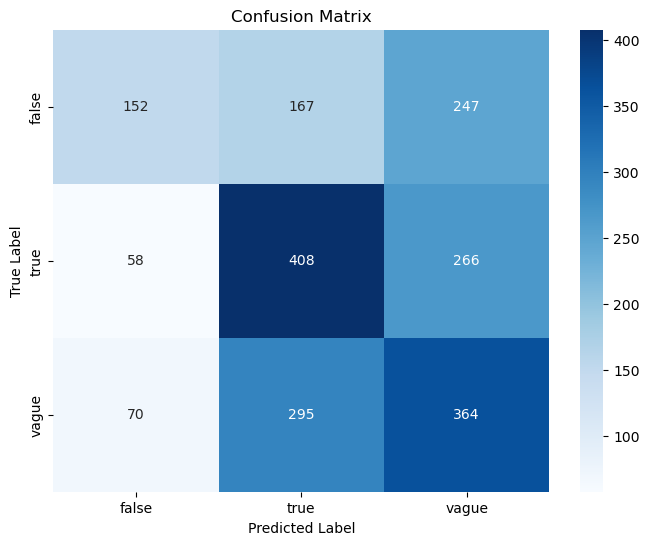

In [64]:
confusion_df = pd.DataFrame(confusion_mat, index=class_labels, columns=class_labels)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()